In [2]:
!pip install sympy

In [1]:
from sympy import *

# V1

In [2]:
a, b, c, e = symbols('a b c e')
d1, d2, d3 = symbols('d1 d2 d3')
x1, x2, x3 = symbols('x1 x2 x3')

In [3]:
M = Matrix([
    [a, b, c],
    [b, a, e],
    [c, e, a]
]) / 3

M_inv = M.inverse_ADJ()

x = Matrix([x1, x2, x3])

In [5]:
d =  x.T * M_inv * x / 3

In [6]:
d = simplify(d)

In [7]:
d

Matrix([[(x1*(-x1*(a**2 - e**2) + x2*(a*b - c*e) + x3*(a*c - b*e)) + x2*(x1*(a*b - c*e) - x2*(a**2 - c**2) + x3*(a*e - b*c)) + x3*(x1*(a*c - b*e) + x2*(a*e - b*c) - x3*(a**2 - b**2)))/(-a**3 + a*b**2 + a*c**2 + a*e**2 - 2*b*c*e)]])

In [8]:
d = d[0]

In [9]:
a_expr = 1/d1 + 1/d2 + 1/d3
b_expr = 1/d1 - 1/d2 - 1/d3
c_expr = 1/d1 + 1/d2 - 1/d3
e_expr = 1/d1 - 1/d2 + 1/d3

In [10]:
d = d.subs([(a, a_expr), (b, b_expr), (c, c_expr), (e, e_expr)]).simplify()

In [11]:
d

d1*x1**2/4 + d1*x1*x2/2 + d1*x2**2/4 + d2*x2**2/4 - d2*x2*x3/2 + d2*x3**2/4 + d3*x1**2/4 - d3*x1*x3/2 + d3*x3**2/4

In [12]:
points = [
    [1, 1, 1],
    [1, -1, 1],
    [1, -1, -1]
]

In [13]:
results = []
for point in points:
    result = d.subs(list(zip([x1, x2, x3], point)))
    results.append(result)
    
results

[d1, d2, d3]

In [14]:
d_f = Function('d')
d_f(x1, x2, x3) >= d

d(x1, x2, x3) >= d1*x1**2/4 + d1*x1*x2/2 + d1*x2**2/4 + d2*x2**2/4 - d2*x2*x3/2 + d2*x3**2/4 + d3*x1**2/4 - d3*x1*x3/2 + d3*x3**2/4

# V2

## Common case

$$\frac{1}{d(x_1, x_2)} (x_1, x_2, x_3) M^{-1}(\varepsilon^0) (x_1, x_2,  x_3)^T \le 3$$

In [149]:
N = 3
n_points = 3

d0, d1, d2 = symbols('d0 d1 d2')
d = Matrix([d0, d1, d2])
X = Matrix(MatrixSymbol('X', N, n_points)).T

In [150]:
X

Matrix([
[X[0, 0], X[1, 0], X[2, 0]],
[X[0, 1], X[1, 1], X[2, 1]],
[X[0, 2], X[1, 2], X[2, 2]]])

In [151]:
M = Matrix.zeros(N)
for i in range(n_points):
    M +=  X[:, i] * X[:, i].T / d[i]

In [152]:
M_exact = M

In [153]:
M_exact

Matrix([
[               X[2, 0]**2/d2 + X[1, 0]**2/d1 + X[0, 0]**2/d0, X[2, 0]*X[2, 1]/d2 + X[1, 0]*X[1, 1]/d1 + X[0, 0]*X[0, 1]/d0, X[2, 0]*X[2, 2]/d2 + X[1, 0]*X[1, 2]/d1 + X[0, 0]*X[0, 2]/d0],
[X[2, 0]*X[2, 1]/d2 + X[1, 0]*X[1, 1]/d1 + X[0, 0]*X[0, 1]/d0,                X[2, 1]**2/d2 + X[1, 1]**2/d1 + X[0, 1]**2/d0, X[2, 1]*X[2, 2]/d2 + X[1, 1]*X[1, 2]/d1 + X[0, 1]*X[0, 2]/d0],
[X[2, 0]*X[2, 2]/d2 + X[1, 0]*X[1, 2]/d1 + X[0, 0]*X[0, 2]/d0, X[2, 1]*X[2, 2]/d2 + X[1, 1]*X[1, 2]/d1 + X[0, 1]*X[0, 2]/d0,                X[2, 2]**2/d2 + X[1, 2]**2/d1 + X[0, 2]**2/d0]])

In [163]:
a, b, c, e = symbols('a b c e')
x0, x1, x2 = symbols('x0 x1 x2')

M = Matrix([
    [a, b, c],
    [b, a, e],
    [c, e, a]
]) / 3

M_inv = M.inverse_ADJ()

x = Matrix([x1, x2, x3])

df =  x.T * M_inv * x / 3
df.simplify()

In [164]:
df

Matrix([[(x1*(-x1*(a**2 - e**2) + x2*(a*b - c*e) + x3*(a*c - b*e)) + x2*(x1*(a*b - c*e) - x2*(a**2 - c**2) + x3*(a*e - b*c)) + x3*(x1*(a*c - b*e) + x2*(a*e - b*c) - x3*(a**2 - b**2)))/(-a**3 + a*b**2 + a*c**2 + a*e**2 - 2*b*c*e)]])

# Plot the cube 

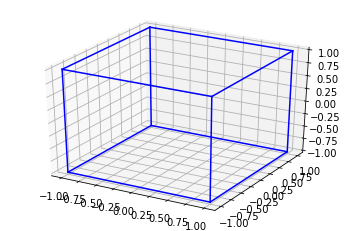

In [167]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from itertools import product, combinations


fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.set_aspect("equal")

# draw cube
r = [-1, 1]
for s, e in combinations(np.array(list(product(r, r, r))), 2):
    if np.sum(np.abs(s-e)) == r[1]-r[0]:
        ax.plot3D(*zip(s, e), color="b")
        